<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/ProblemaTarea_productoEmpresa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema Tarea - Ejercicio para clase**
Una empresa dedicada a la comercialización de un producto de mucho éxito quiere determinar el número de unidades que debe comprar con el objetivo de satisfacer la demanda de sus clientes los próximos meses. La distribución de las ventas de los últimos tres años se recoge en la tabla siguiente.
$$$$

|Unidades vendidas|100|200|300|400|500|600|
|-|-|-|-|-|-|-|
|Frecuencia (meses)|8|9|4|9|4|2|

$$$$
El coste de cada unidad de producto asciende a 750 euros, siendo su precio de venta unitario de 1000 euros. Se sabe que dentro de un mes saldrá al mercado un nuevo modelo de características muy superiores al modelo actual. Cuando esto ocurra la empresa podrá devolver al distribuidor las unidades sobrantes del modelo actual y este le indemnizará con 250 euros por cada unidad retornada.
$$$$

# **Resolución**
## **1. Identifique las variables.**

Tenemos una: 

1.   $X:=$ Unidades vendidas en un mes.

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema, se sigue que la variable aleatoria $\,X\,$ posee una distribución discreta no uniforme.

## **3. Modele las variables aleatorias.**

Utilizamos la frecuencia relativa de cada cantidad de unidades vendidas en el periodo de los últimos tres años para estimar la distribución del número de unidades vendidas en un mes. Se sigue que
$$$$

|$X$|100|200|300|400|500|600|
|-|-|-|-|-|-|-|
|$P(X)$|$\frac{2}{9}$|$\frac{1}{4}$|$\frac{1}{9}$|$\frac{1}{4}$|$\frac{1}{9}$|$\frac{1}{18}$|

$$$$
## **4. Defina el modelo del sistema y los objetivos de la simulación.**

Sea el beneficio de la empresa cuando las unidades vendidas en un mes son menores que las unidades compradas para un mes; es decir, cuando $\,X < \mathrm{Pedido}\,$, expresado mediante la siguiente fórmula.
$$$$

$$B_x(X) = 1000X + 250(\mathrm{Pedido} - X) - 750(\mathrm{Pedido}) = 750X - 500(\mathrm{Pedido})$$

$$$$
Y sea el beneficio de la empresa cuando las unidades vendidas son mayores o iguales al número de unidades compradas para su venta; es decir, cuando $\,X\geq\mathrm{Pedido}\,$, expresado mediante la siguiente fórmula.
$$$$

$$B_X(X) = 250(\mathrm{Pedido})$$

### **Objetivo:**

Calcular el beneficio esperado en cada caso (unidades compradas para su venta) y verificar en qué caso este es mayor.

Por lo tanto, implementamos el siguiente código:

In [1]:
import random
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
n_unidades = [100, 200, 300, 400, 500, 600]
long = len(n_unidades)

In [3]:
def observacion():
  X = np.random.choice([100, 200, 300, 400, 500, 600], p = [2/9, 0.25, 1/9, 0.25, 1/9, 1/18])
  return X

In [4]:
observacion()

200

## **5. Diseñe el experimento.**

In [5]:
def experimento_un_caso(n, pedido):
  sum_beneficio = 0
  evol_prom = []
  for i in range(n):
    X = observacion()
    if X < pedido:
      beneficio = 750*X - 500*pedido
    else:
      beneficio = 250*pedido
    sum_beneficio += beneficio
    evol_prom.append(sum_beneficio/(i+1))
  return evol_prom

Ahora analizamos la convergencia para cada caso.

In [6]:
colores = ['r', 'orange', 'b', 'g', 'm', 'k']

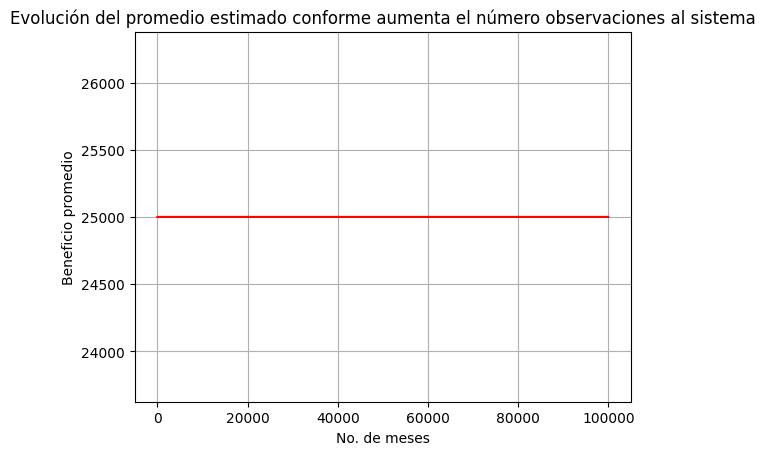

In [7]:
evol_prom = experimento_un_caso(100000, 100)
evol_proms = [evol_prom]

plt.plot(evol_prom, colores[0])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

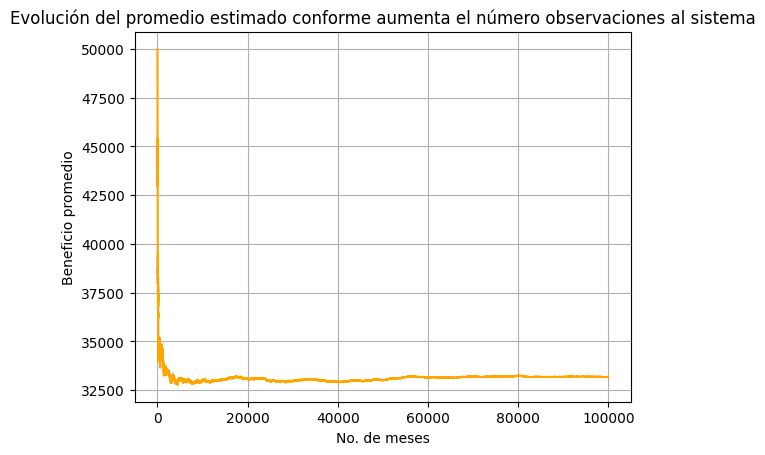

In [8]:
evol_prom = experimento_un_caso(100000, 200)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[1])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

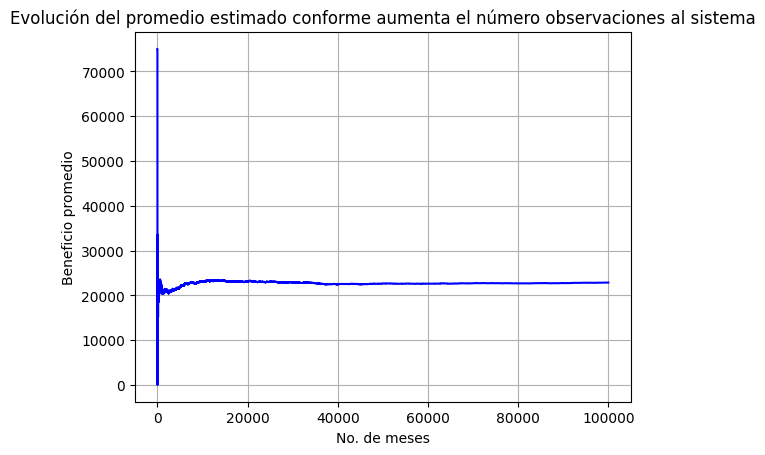

In [9]:
evol_prom = experimento_un_caso(100000, 300)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[2])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

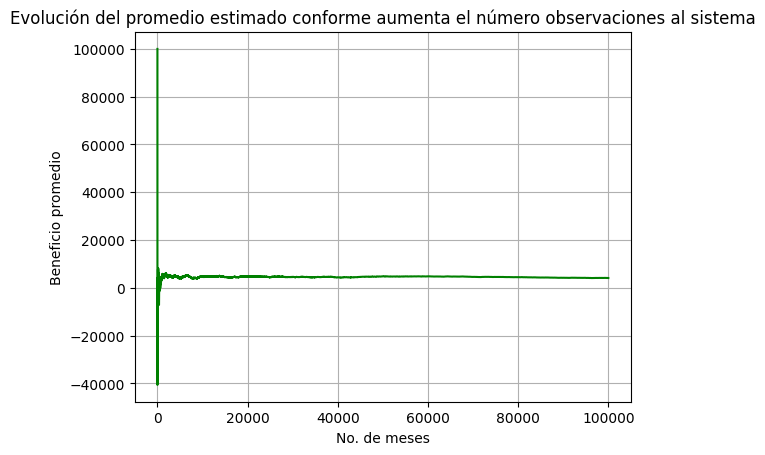

In [10]:
evol_prom = experimento_un_caso(100000, 400)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[3])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

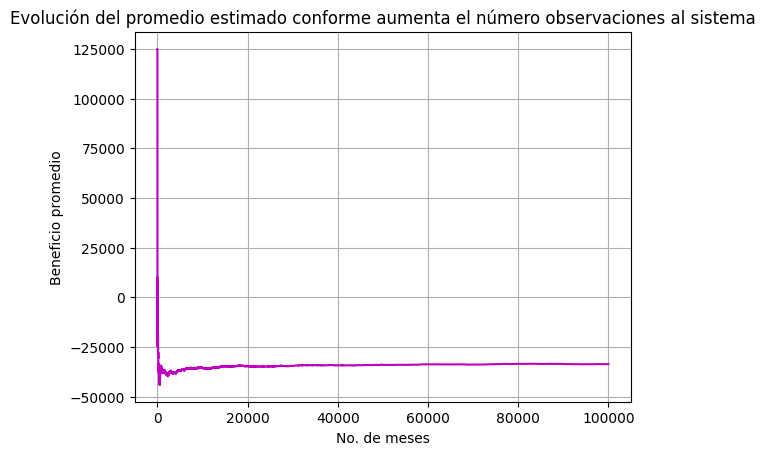

In [11]:
evol_prom = experimento_un_caso(100000, 500)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[4])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

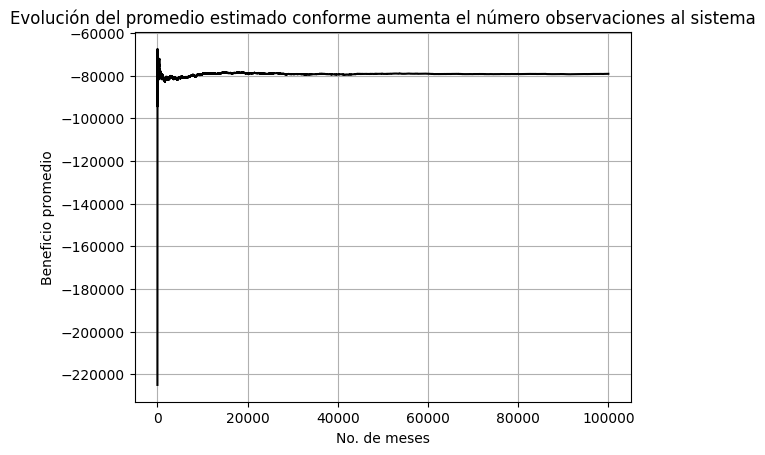

In [12]:
evol_prom = experimento_un_caso(100000, 600)
evol_proms.append(evol_prom)

plt.plot(evol_prom, colores[5])   
plt.xlabel('No. de meses')    
plt.ylabel('Beneficio promedio')
plt.grid(True)
plt.title('Evolución del promedio estimado conforme aumenta el número observaciones al sistema')
plt.show()

In [13]:
n = [1, 60000, 40000, 20000, 40000, 40000]

In [14]:
for pedido in range(long):
  print(n_unidades[pedido],': mu =', np.mean(evol_proms[pedido]), ', sigma =', np.std(evol_proms[pedido]))

100 : mu = 25000.0 , sigma = 0.0
200 : mu = 33124.96169497891 , sigma = 412.3993231075985
300 : mu = 22673.88952858501 , sigma = 535.9515959191732
400 : mu = 4525.492879402388 , sigma = 762.2054075813627
500 : mu = -34320.54047310989 , sigma = 1626.3653591896334
600 : mu = -79323.99377455746 , sigma = 900.1578778537222


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align*}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align*}

Implementamos el siguiente código:

In [15]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error del promedio estimado.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [16]:
N = []
for pedido in range(long):
  N.append(int(np.ceil((2 * np.std(evol_proms[pedido]) * norm.ppf(1 - alpha / 2) / epsilon)**2)))
print(N)

[0, 26133168034, 44137457289, 89268908491, 406436220630, 124506936273]


In [17]:
N = [100]*5
N.insert(0, 0)
print(N)

[0, 100, 100, 100, 100, 100]


In [18]:
def simulacion(N, n, n_unidades):
  prom = [[] for _ in range(len(n_unidades))]
  pedido = 0
  for N_sub in N:
    for i in range(N_sub):
      evol_prom = experimento_un_caso(n[pedido], n_unidades[pedido])
      prom[pedido].append(np.mean(evol_prom))
    pedido += 1
  return prom

In [19]:
prom = simulacion(N, n, n_unidades)

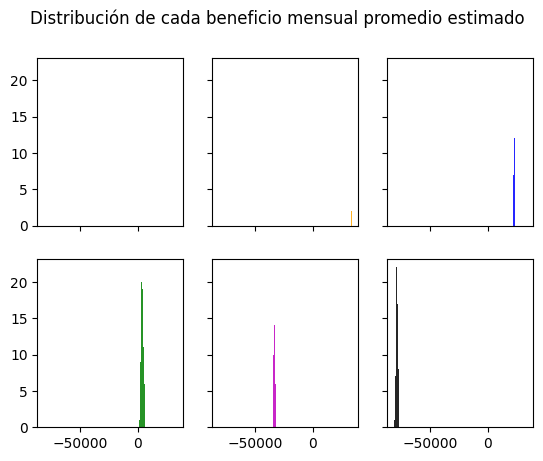

In [20]:
fig, axs = plt.subplots(2, 3, sharex = True, sharey = True)
fig.suptitle('Distribución de cada beneficio mensual promedio estimado')
pedido = 0
for i in range(2):
  for j in range(3):
    axs[i, j].hist(prom[pedido], color = colores[pedido], alpha = 0.85)
    pedido += 1

for ax in axs.flat:
    ax.label_outer()

plt.show()

In [21]:
prom[0] = [25000]
for pedido in range(long):
  print(n_unidades[pedido],': mu =', np.mean(prom[pedido]), ', sigma =', np.std(prom[pedido]))

100 : mu = 25000.0 , sigma = 0.0
200 : mu = 33333.87915795194 , sigma = 190.14659284070075
300 : mu = 22913.504709936024 , sigma = 402.53995494598814
400 : mu = 4058.7578281249207 , sigma = 995.3331320912938
500 : mu = -33274.47751498297 , sigma = 683.6923704045364
600 : mu = -79305.47373262305 , sigma = 825.5050311736418


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align*}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align*}

Implementamos el siguiente código:

In [22]:
mu = []
for pedido in range(long):
  mu.append(np.mean(prom[pedido]))
  li = mu[pedido] - norm.ppf(1 - alpha / 2) * np.std(prom[pedido]) / np.sqrt(n[pedido])
  ls = mu[pedido] + norm.ppf(1 - alpha / 2) * np.std(prom[pedido]) / np.sqrt(n[pedido])
  print(n_unidades[pedido], ':', li, '<', mu[pedido], '<', ls)

100 : 25000.0 < 25000.0 < 25000.0
200 : 33332.35769628896 < 33333.87915795194 < 33335.40061961492
300 : 22909.55989086586 < 22913.504709936024 < 22917.449529006186
400 : 4044.963468182248 < 4058.7578281249207 < 4072.5521880675933
500 : -33281.17757709546 < -33274.47751498297 < -33267.77745287048
600 : -79313.56353327383 < -79305.47373262305 < -79297.38393197228


## **8. Comparamos con la solución analítica.**

Determinamos el beneficio esperado para cada caso (unidades compradas para su posterior venta) generando el beneficio obtenido en cada escenario (ventas mayores a las unidades compradas y viceversa) y calculando el valor esperado del beneficio considerando cada escenario.

Implementamos el siguiente código para no escribir a lo wey.

In [26]:
p = [2/9, 0.25, 1/9, 0.25, 1/9, 1/18]
mu_ana = []
for i in range(long):
  sum = 0
  for j in range(long):
    if n_unidades[j] < n_unidades[i]:
      beneficio = 750*n_unidades[j] - 500*n_unidades[i]
    else:
      beneficio = 250*n_unidades[i]
    sum += p[j]*beneficio
  mu_ana.append(sum)
print(mu_ana)

[25000.0, 33333.333333333336, 22916.666666666664, 4166.666666666667, -33333.33333333332, -79166.66666666667]


# **Solución**

In [31]:
print('El el valor esperado del beneficio esperado en cada caso son:')

for caso in range(long):
  print(n_unidades[caso],'unidades compradas:   beneficio esperado =', mu[caso], 'euros.')
print('\n\n')

print('Los cuales difieren, respectivamente, de la solución analítica en un ')
for caso in range(long):
  print(str(abs(mu[caso] - mu_ana[caso])*100 / mu_ana[caso]) + '%.')
print('\n\n')

print('Por lo tanto, las unidades que debe comprar la empresa para maximizar su ganancia son', n_unidades[mu.index(max(mu))])

El el valor esperado del beneficio esperado en cada caso son:
100 unidades compradas:   beneficio esperado = 25000.0 euros.
200 unidades compradas:   beneficio esperado = 33333.87915795194 euros.
300 unidades compradas:   beneficio esperado = 22913.504709936024 euros.
400 unidades compradas:   beneficio esperado = 4058.7578281249207 euros.
500 unidades compradas:   beneficio esperado = -33274.47751498297 euros.
600 unidades compradas:   beneficio esperado = -79305.47373262305 euros.



Los cuales difieren, respectivamente, de la solución analítica en un 
0.0%.
0.0016374738558079115%.
0.01379762937006837%.
2.58981212500191%.
-0.17656745505104487%.
-0.17533524120806127%.



Por lo tanto, las unidades que debe comprar la empresa para maximizar su ganancia son 200
